In [1]:
import requests
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
symbol = "BTCAUD"

In [39]:
r = requests.get("https://api.binance.com/api/v3/depth", params=dict(symbol=symbol))
results = r.json()

In [40]:
frames = []
for kind in ["bids", "asks"]:
    frame = pd.DataFrame(data=results[kind], columns=["price", "amount"], dtype=float).assign(kind=kind)
    frames.append(frame)

In [41]:
data = pd.concat(frames, axis="index", sort=True)
data

,amount,kind,price
0,0.003597,bids,33902.06
1,0.616823,bids,33889.80
2,0.736302,bids,33870.01
3,0.748031,bids,33850.02
4,0.777059,bids,33824.75
...,...,...,...
89,0.100000,asks,119777.90
90,0.336713,asks,119999.90
91,20.000000,asks,120000.00
92,0.001612,asks,128000.00


In [42]:
data.amount

0      0.003597
1      0.616823
2      0.736302
3      0.748031
4      0.777059
        ...    
89     0.100000
90     0.336713
91    20.000000
92     0.001612
93     0.010000
Name: amount, Length: 194, dtype: float64

In [49]:
data.groupby("kind").min()

,amount,price
kind,,
asks,0.000296,33910.26
bids,0.000298,32839.87


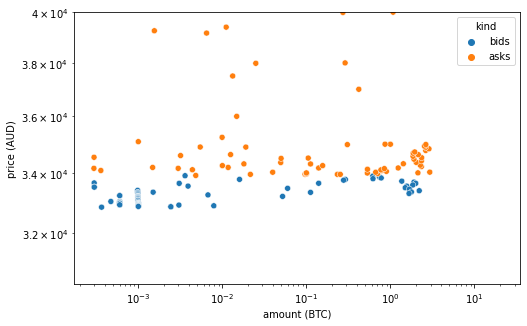

In [48]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(y='price', x='amount', hue='kind', data=data, ax=ax)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("amount (BTC)")
ax.set_ylabel("price (AUD)")

ax.set_ylim(None, 4e+4)

plt.show()

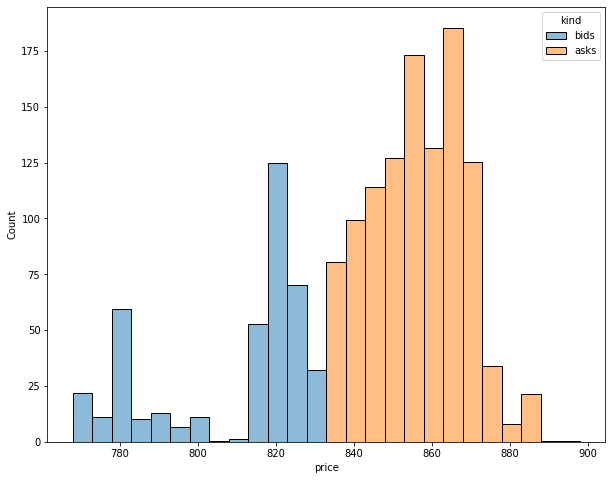

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.histplot(x='price', weights='amount', hue='kind', binwidth=5.0, data=data, ax=ax)

plt.show()